In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

import networkx as nx
import community as cmnt # python-louvain library

import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from importlib import reload
import nx_tools as nxt

# 1. Network Overview 

Directed network including 'Unemployed' and 'Student'

In [249]:
df_origin1 = pd.read_csv("../data/processed/edges_and_weight.csv")
df_origin1.head(3)

weight source        target
0       1   2910           340
1       1   2720          2200
2       8   2200  'Unemployed'

In [250]:
sum(df_origin1.duplicated(subset=["source","target"]))

0

In [251]:
G1 = nx.DiGraph()

for i in range(df_origin1.shape[0]):
    G1.add_edge(df_origin1.loc[i,'source'], df_origin1.loc[i,'target'], weight=df_origin1.loc[i,'weight'])


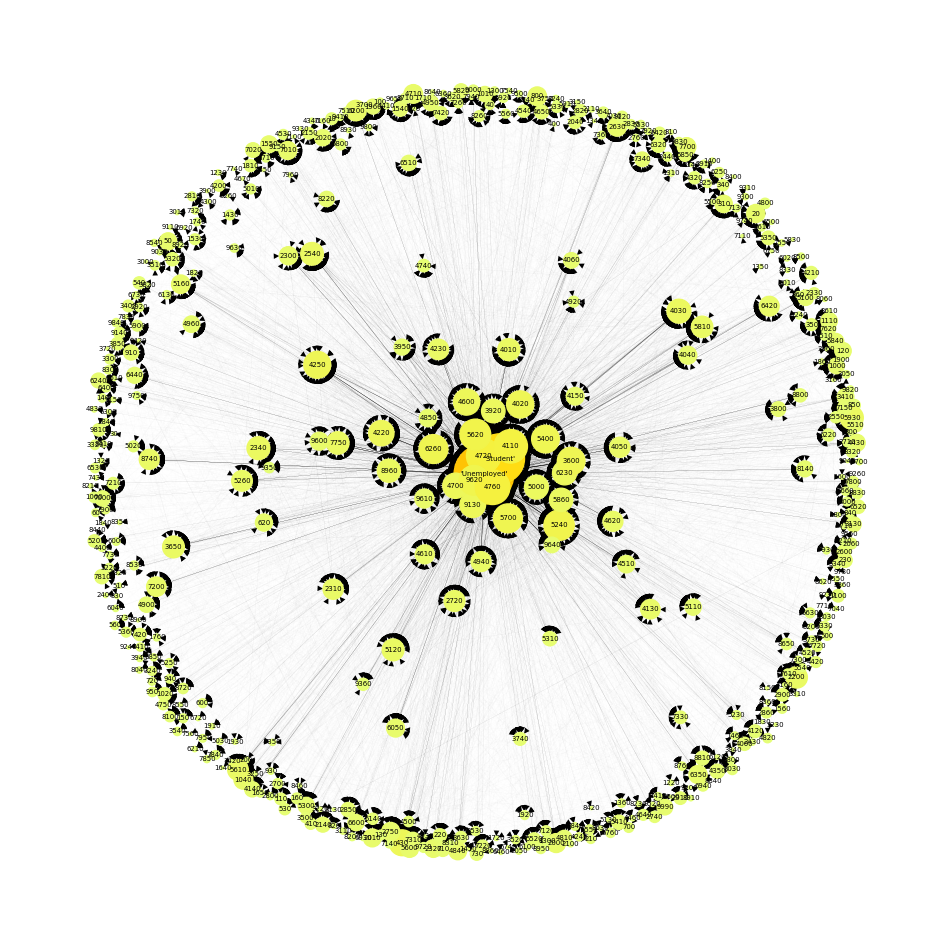

In [15]:
cmap_n = plt.colormaps.get_cmap("Wistia")
colors_n = [cmap_n(val/800) for val in dict(G1.in_degree).values()]
node_size=[val*5 for val in dict(G1.in_degree).values()]
edge_thickness = [(val[2]/1000)*2 for val in G1.edges.data("weight")]

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)

nx.draw(
        G1,
	    node_color=colors_n,
	    # edge_color=colors_e,
        # edgecolors="black",
	    node_size=node_size, 
	    width=edge_thickness,
	    with_labels=True,
        font_color="black",
        font_size=5,
	    pos=nx.spring_layout(G1, k=80*1./np.sqrt(len(G1.nodes)), iterations=100),
        ax=ax
    )
plt.show()

In [9]:
reload(nxt)
nxt.network_summary(G1)

GENERAL
	number of nodes: 478
	number of edges: 7883
	is_directed: True
	is_weighted: True
	is_strongly_connected: False
	is_weakly_connected: True
IN-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.034573651570572704
	median: 0.016771488469601678
	max: 0.7756813417190777
	top nodes: ["'Unemployed'", "'Student'", '4760', '4720', '4110', '5620', '5240', '9620', '5700', '6260', '3600', '5400']
	           [0.7756813417190777, 0.5345911949685535, 0.25995807127882603, 0.2557651991614256, 0.24318658280922434, 0.20545073375262055, 0.19916142557651992, 0.1907756813417191, 0.18029350104821804, 0.18029350104821804, 0.16561844863731656, 0.16561844863731656]
	tail nodes: ['9240', '1640', '8150', '8440', '7710', '8840', '3750', '9560', '9730', '9260']
	           [0.0020964360587002098, 0.0020964360587002098, 0.0020964360587002098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
OUT-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.03457365157057271
	median: 0.012578616352201259
	max: 0.7379454926624738
	top nodes: ["'Unemployed'

# 2. Directed Network excluding 'Unemployed' and 'Student'

In [16]:
df_origin2 = pd.read_csv("../data/processed/edges_and_weight(occ).csv")
df_origin2.head(3)

weight  source  target
0       1    2910     340
1       1    2720    2200
2       3    2720     430

In [17]:
G2 = nx.DiGraph()

for i in range(df_origin2.shape[0]):
    G2.add_edge(df_origin2.loc[i,'source'], df_origin2.loc[i,'target'], weight=df_origin2.loc[i,'weight'])

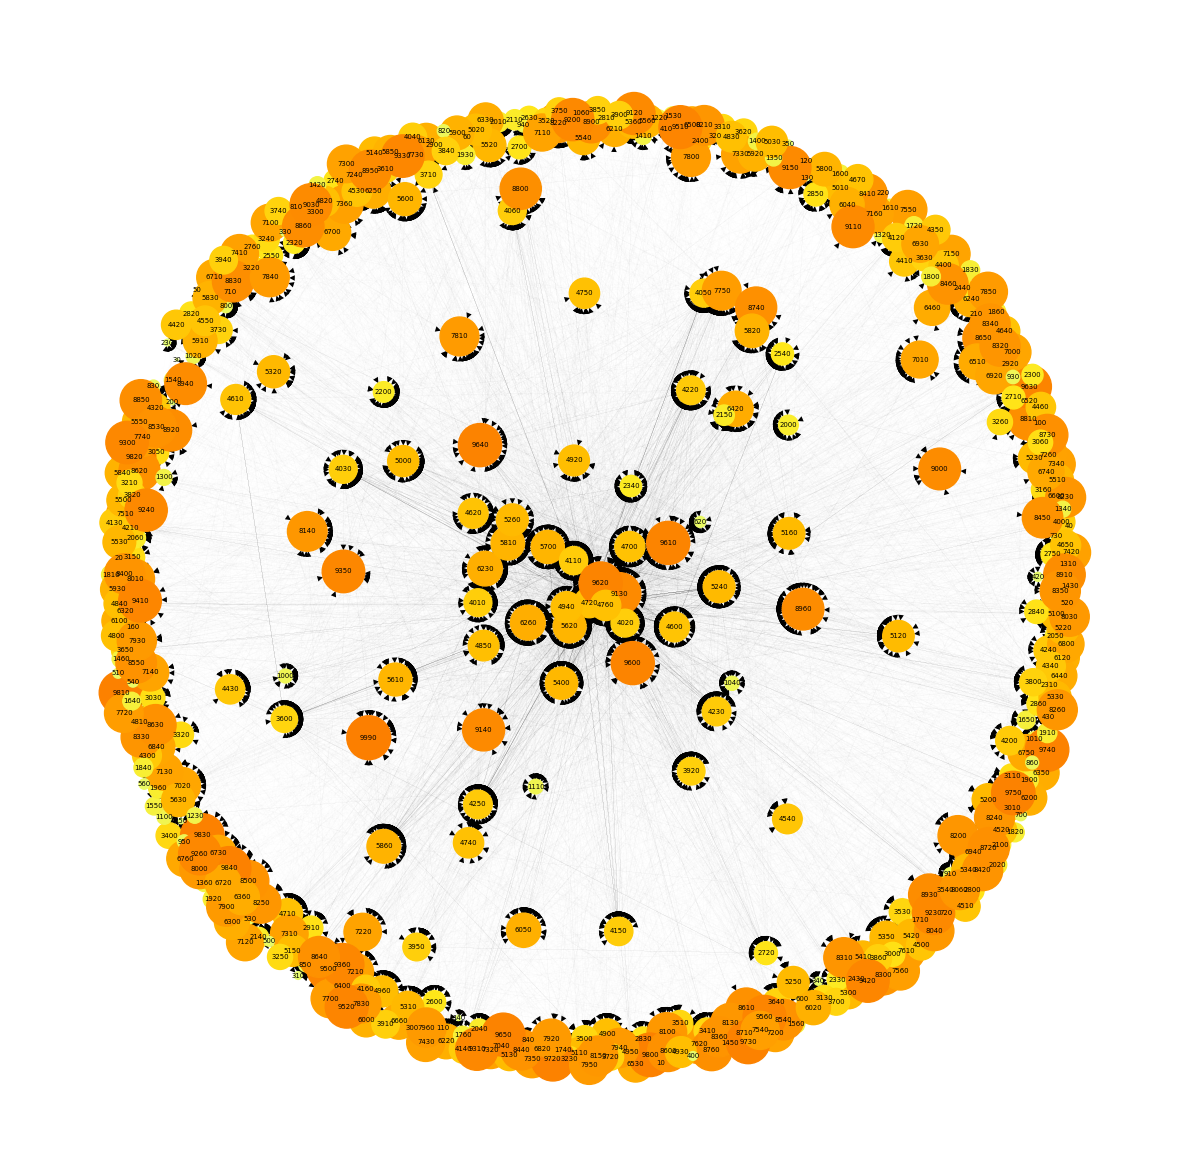

In [13]:
cmap_n = plt.colormaps.get_cmap("Wistia")

centrality = nx.in_degree_centrality(G2)
# colors_n = [cmap_n(val/800) for val in dict(G2.in_degree).values()]
colors_n = [cmap_n(u/(0.01+max(centrality))) for u in centrality]
# node_size = [val*7 for val in dict(G2.in_degree).values()]
node_size = [1000*u/(0.01+max(centrality)) for u in centrality]
edge_thickness = [(val[2]/1000)*2 for val in G2.edges.data("weight")]

fig, ax = plt.subplots()
fig.set_size_inches(15, 15)

nx.draw(
        G2,
	    node_color=colors_n,
	    node_size=node_size, 
	    width=edge_thickness,
	    with_labels=True,
        font_color="black",
        font_size=5,
	    pos=nx.spring_layout(G2, k=80*1./np.sqrt(len(G2.nodes)), iterations=100),
        ax=ax
    )
plt.show()

In [18]:
reload(nxt)
nxt.network_summary(G2)

GENERAL
	number of nodes: 472
	number of edges: 8370
	is_directed: True
	is_weighted: True
	is_strongly_connected: False
	is_weakly_connected: True
IN-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.03764978948504804
	median: 0.01910828025477707
	max: 0.3078556263269639
	top nodes: [4760, 4720, 4110, 5620, 5240, 6260, 9620, 4020, 4250, 5700, 5400, 4220]
	           [0.3078556263269639, 0.29723991507430997, 0.28662420382165604, 0.24416135881104034, 0.23779193205944799, 0.2229299363057325, 0.2229299363057325, 0.21443736730360935, 0.21019108280254778, 0.20382165605095542, 0.20382165605095542, 0.19745222929936304]
	tail nodes: [9110, 8150, 8450, 8440, 3840, 3750, 9560, 9730, 9260, 9330]
	           [0.0021231422505307855, 0.0021231422505307855, 0.0021231422505307855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
OUT-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.037649789485048046
	median: 0.012738853503184714
	max: 0.4989384288747346
	top nodes: [9620, 4760, 4720, 9130, 4110, 4700, 5620, 5240, 4020, 9610, 5700, 5400

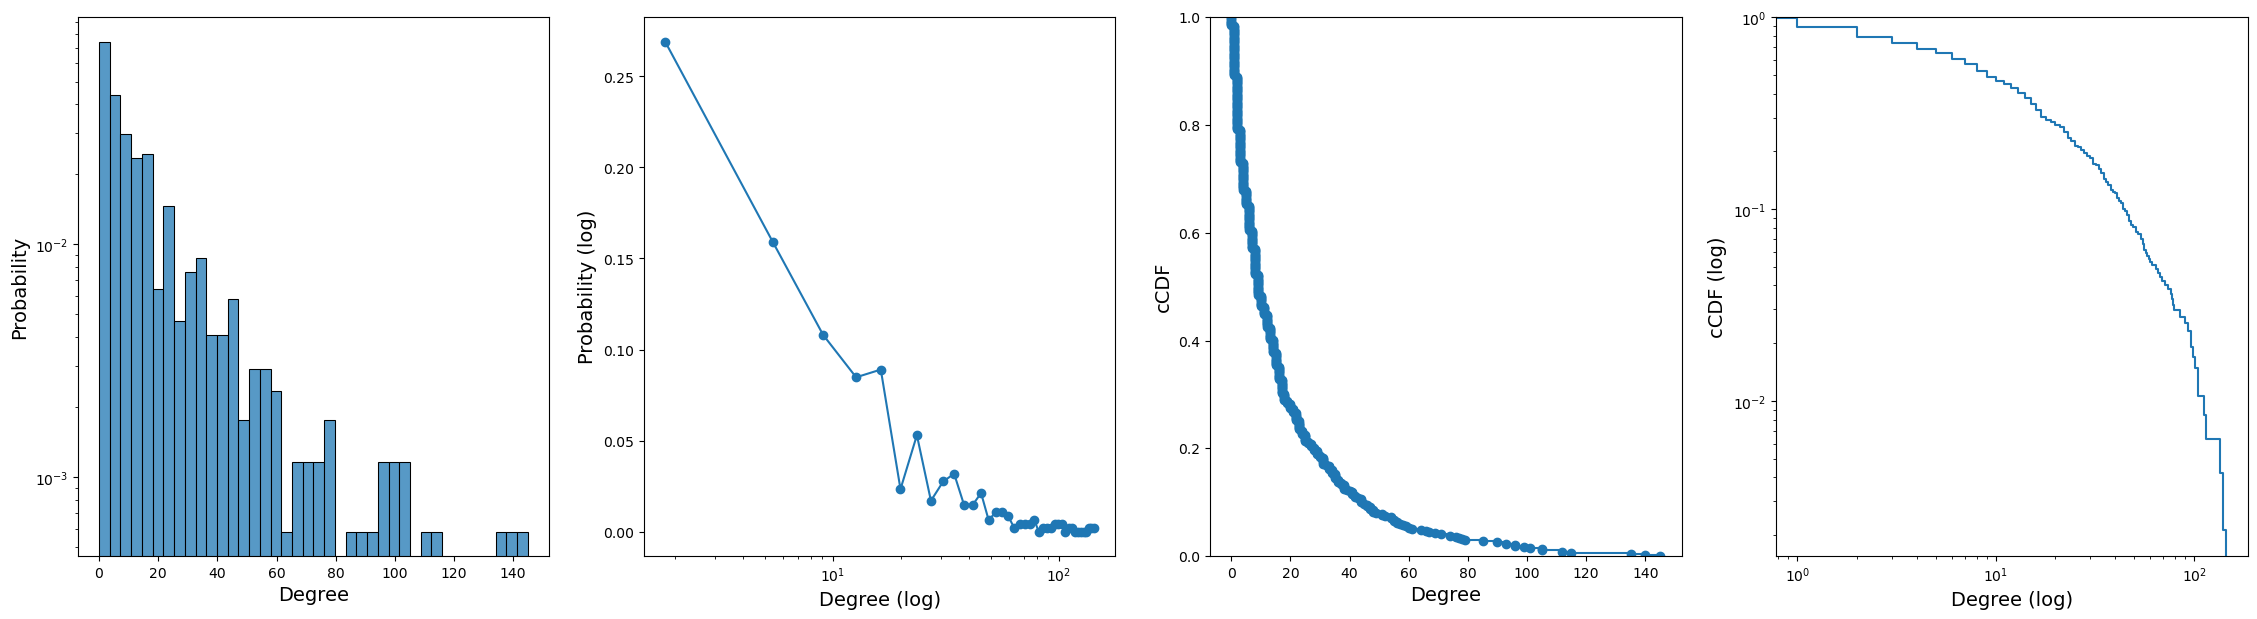

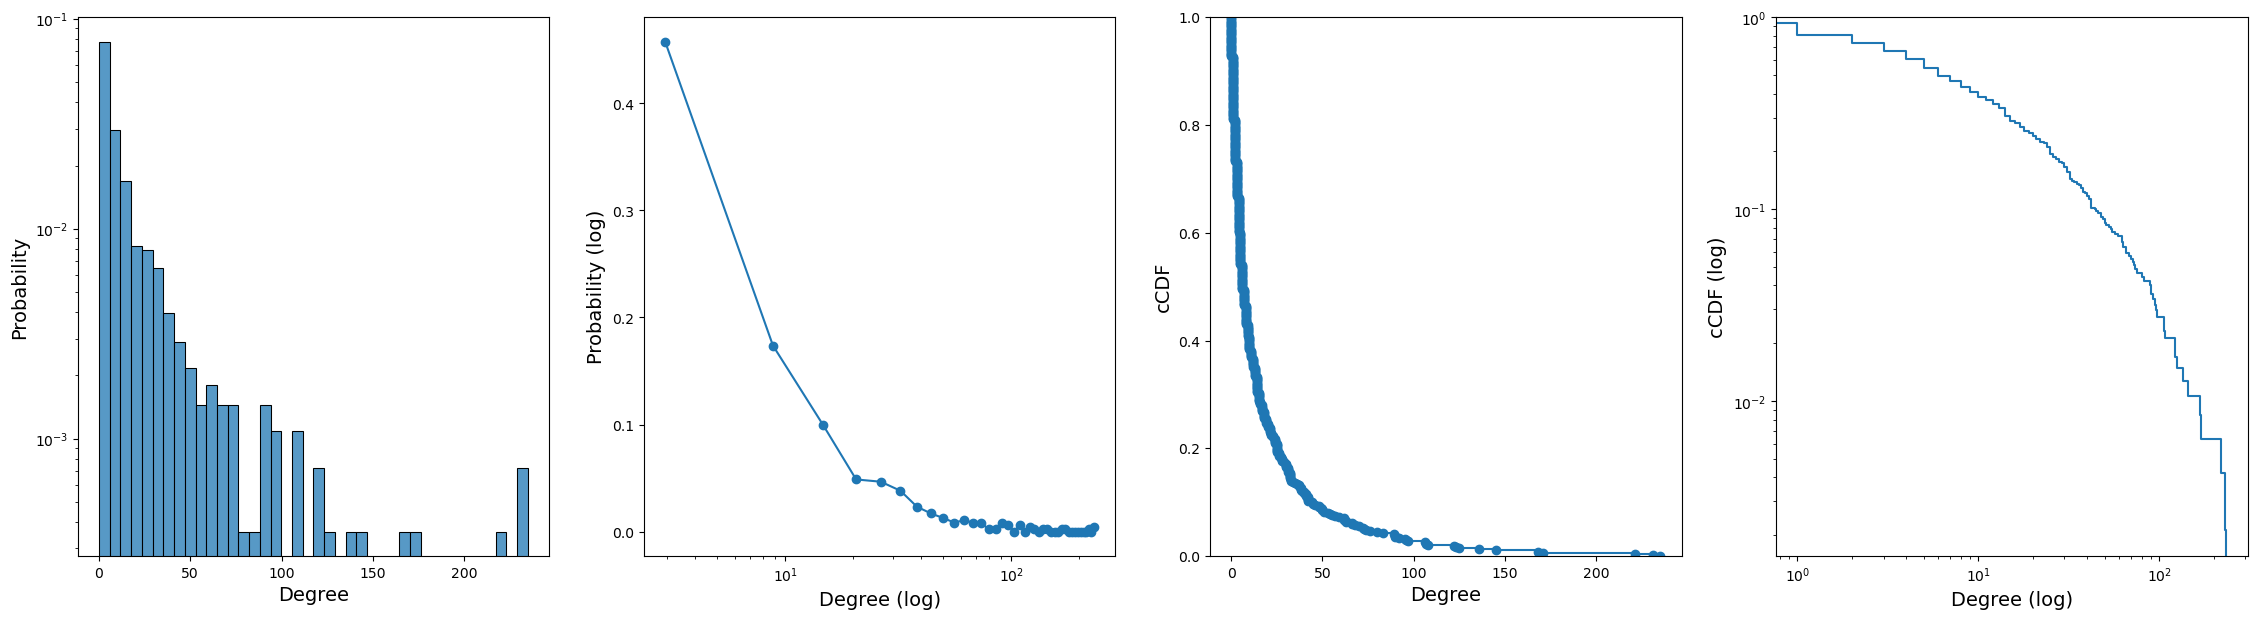

In [19]:
reload(nxt)
nxt.plot_degree_distribution(G2, type="in",path="../outputs/in-degree_distribution.jpg")
nxt.plot_degree_distribution(G2, type="out",path="../outputs/out-degree_distribution.jpg")

## 2.1 Employee Turnover Rate

$\text{turnover} = \dfrac{\text{out-degree}}{\text{in-degree}}$

- If turnover_rate is greater than 1, out-degree > in-degree, it means that
- If turnover_rate is less than 1, out-degree < in-degree, it means that
- If turnover_rate is equal to 1, out-degree = in-degree, it means that
- If turnover_rate is inf, in-degree = 0, it means that 

In [ ]:
nodes_index = list(dict(G2.nodes))
indegree = list(dict(G2.in_degree).values())
outdegree = list(dict(G2.out_degree).values())
closeness = list(nx.closeness_centrality(G2).values())
betweenness = list(nx.betweenness_centrality(G2).values())
turnover_rate = [0]*len(nodes_index)

df_turnover = pd.DataFrame({"occ":nodes_index,"indegree":indegree,"outdegree":outdegree,"closeness":closeness,"betweenness":betweenness,"turnover_rate":turnover_rate})
for i in range(df_turnover.shape[0]):
    df_turnover.loc[i,"turnover_rate"] = df_turnover.loc[i,"outdegree"] / df_turnover.loc[i,"indegree"]
df_turnover.head(3)

df_occ = pd.read_csv("../data/original/2002-census-occupation-codes.csv")
joined = pd.merge(df_turnover, df_occ, on='occ', how='inner')
joined.sort_values(by="turnover_rate",ascending=False,inplace=True)
joined.to_csv("../data/analyzed/turnover_rate.csv", index=False)

In [60]:
df_turnover = pd.read_csv("../data/analyzed/turnover_rate.csv")

hover_text = []
for _, row in df_turnover.iterrows():
    hover_text.append(('occ: {occ}<br>'+
                      'In-degree: {indegree}<br>'+
                      'Out-degree: {outdegree}<br>'+
                      'Closeness: {closeness}<br>'+
                      'Betweenness: {betweenness}<br>'+
                      'Turnover Rate: {turnover_rate}').format(occ=row["occ"],
                                            indegree=row['indegree'],
                                            outdegree=row['outdegree'],
                                            closeness=row['closeness'],
                                            betweenness=row['betweenness'],
                                            turnover_rate=row['turnover_rate']))

fig = go.Figure(
    data=go.Scatter(
        x = df_turnover["indegree"],
        y = df_turnover["outdegree"],
        mode='markers',
        marker_size = df_turnover["turnover_rate"]*15,
        text=hover_text,
        hoverinfo='text',
    ))

fig.show()

In [61]:
high_turnover_rate = df_turnover[df_turnover["turnover_rate"]>1].sort_values(by="turnover_rate",ascending=False)
high_turnover_rate

occ  indegree  outdegree  closeness  betweenness  turnover_rate  \
0    9330         0          1   0.000000     0.000000            inf   
4    3840         0          3   0.000000     0.000000            inf   
6    8440         0          1   0.000000     0.000000            inf   
5    9730         0          2   0.000000     0.000000            inf   
1    9260         0          3   0.000000     0.000000            inf   
..    ...       ...        ...        ...          ...            ...   
135  5020        13         14   0.386147     0.000184       1.076923   
136  4420        13         14   0.387253     0.000899       1.076923   
137  5120        56         59   0.448511     0.005838       1.053571   
138  1110        30         31   0.420596     0.001818       1.033333   
139  5100        31         32   0.427244     0.003005       1.032258   

                                            occupation  
0                                       Ship engineers  
4                          Parking enforcement workers  
6                     Fabric and apparel patternmakers  
5                                Shuttle car operators  
1    Subway, streetcar, and other rail transportati...  
..                                                 ...  
135                                Telephone operators  
136        Ushers, lobby attendants, and ticket takers  
137       Bookkeeping, accounting, and auditing clerks  
138   Network systems and data communications analysts  
139                        Bill and account collectors  

[140 rows x 7 columns]

In [62]:
high_turnover_rate_noninf = high_turnover_rate[~np.isinf(high_turnover_rate["turnover_rate"])]
high_turnover_rate_noninf

occ  indegree  outdegree  closeness  betweenness  turnover_rate  \
7    9520         2         12   0.316267     0.000025       6.000000   
8    9420         1          6   0.336477     0.000017       6.000000   
9    9650         1          5   0.245284     0.000330       5.000000   
10   9350        11         46   0.369940     0.002901       4.181818   
11   9000        10         41   0.365934     0.003583       4.100000   
..    ...       ...        ...        ...          ...            ...   
135  5020        13         14   0.386147     0.000184       1.076923   
136  4420        13         14   0.387253     0.000899       1.076923   
137  5120        56         59   0.448511     0.005838       1.053571   
138  1110        30         31   0.420596     0.001818       1.033333   
139  5100        31         32   0.427244     0.003005       1.032258   

                                            occupation  
7    Dredge, excavating, and loading machine operators  
8                        Other transportation workers   
9                            Pumping station operators  
10                              Parking lot attendants  
11   Supervisors, transportation and material movin...  
..                                                 ...  
135                                Telephone operators  
136        Ushers, lobby attendants, and ticket takers  
137       Bookkeeping, accounting, and auditing clerks  
138   Network systems and data communications analysts  
139                        Bill and account collectors  

[133 rows x 7 columns]

In [ ]:
inf_turnover_rate = df_turnover[df_turnover["indegree"]==0].sort_values(by="turnover_rate",ascending=True)
inf_turnover_rate

occ  indegree  outdegree  closeness  betweenness  turnover_rate  \
0  9330         0          1        0.0          0.0            inf   
1  9260         0          3        0.0          0.0            inf   
2  9560         0          5        0.0          0.0            inf   
3  3750         0          2        0.0          0.0            inf   
4  3840         0          3        0.0          0.0            inf   
5  9730         0          2        0.0          0.0            inf   
6  8440         0          1        0.0          0.0            inf   

                                          occupation  
0                                     Ship engineers  
1  Subway, streetcar, and other rail transportati...  
2                          Hoist and winch operators  
3                                    Fire inspectors  
4                        Parking enforcement workers  
5                              Shuttle car operators  
6                   Fabric and apparel patternmakers

In [63]:
low_turnover_rate = df_turnover[(df_turnover["turnover_rate"]<1)&(df_turnover["turnover_rate"]>0)].sort_values(by="turnover_rate",ascending=True)
low_turnover_rate

occ  indegree  outdegree  closeness  betweenness  turnover_rate  \
434   110        16          1   0.388366     0.000018       0.062500   
433  1300         9          1   0.374727     0.002118       0.111111   
431  2100         8          1   0.366264     0.000021       0.125000   
432  9830         8          1   0.361046     0.000011       0.125000   
430   350        15          2   0.383227     0.002143       0.133333   
..    ...       ...        ...        ...          ...            ...   
189  5610        51         49   0.446044     0.006168       0.960784   
188  5110        31         30   0.420160     0.001087       0.967742   
187  4060        33         32   0.427244     0.001278       0.969697   
186  1040        38         37   0.432715     0.008611       0.973684   
185  6420        55         54   0.445554     0.006225       0.981818   

                                            occupation  
434          Computer and information systems managers  
433                           Architects, except naval  
431                                            Lawyers  
432                       Military, rank not specified  
430               Medical and health services managers  
..                                                 ...  
189            Shipping, receiving, and traffic clerks  
188   Billing and posting clerks and machine operators  
187  Counter attendants, cafeteria, food concession...  
186                       Computer support specialists  
185             Painters, construction and maintenance  

[250 rows x 7 columns]

In [64]:
zero_turnover_rate = df_turnover[df_turnover["turnover_rate"]==0].sort_values(by="turnover_rate",ascending=True)
zero_turnover_rate

occ  indegree  outdegree  closeness  betweenness  turnover_rate  \
435  8150         1          0   0.334136          0.0            0.0   
466  4930         1          0   0.293664          0.0            0.0   
465  6020         3          0   0.345766          0.0            0.0   
464  7430         2          0   0.347536          0.0            0.0   
463  1840         1          0   0.284436          0.0            0.0   
462  8600         1          0   0.207812          0.0            0.0   
461  7930         4          0   0.349025          0.0            0.0   
460  1420         1          0   0.295582          0.0            0.0   
459  8410         4          0   0.319962          0.0            0.0   
458  6820         1          0   0.307638          0.0            0.0   
457  1450         1          0   0.298397          0.0            0.0   
456  3160         1          0   0.266217          0.0            0.0   
455  3230         1          0   0.290522          0.0            0.0   
454   820         4          0   0.336622          0.0            0.0   
453   320         1          0   0.326111          0.0            0.0   
452  5500         2          0   0.328478          0.0            0.0   
451  6700         4          0   0.347240          0.0            0.0   
450  1820         4          0   0.320466          0.0            0.0   
436  1640         1          0   0.254729          0.0            0.0   
437  6740         1          0   0.291771          0.0            0.0   
438  3900         1          0   0.324551          0.0            0.0   
439  8360         1          0   0.324551          0.0            0.0   
440  1720         2          0   0.329807          0.0            0.0   
441  3250         2          0   0.341418          0.0            0.0   
467   400         1          0   0.320214          0.0            0.0   
442  1800         1          0   0.337179          0.0            0.0   
444  3220         2          0   0.302385          0.0            0.0   
445  3050         5          0   0.357605          0.0            0.0   
446  6920         1          0   0.276895          0.0            0.0   
447  7360         5          0   0.334411          0.0            0.0   
448  9800         4          0   0.332228          0.0            0.0   
449  3150         2          0   0.308804          0.0            0.0   
443  3260         1          0   0.288874          0.0            0.0   
468  7100         1          0   0.276895          0.0            0.0   

                                            occupation  
435  Heat treating equipment setters, operators, an...  
466                                    Sales engineers  
465                                    Animal breeders  
464       Precision instrument and equipment repairers  
463                        Urban and regional planners  
462  Power plant operators, distributors, and dispa...  
461  Forging machine setters, operators, and tender...  
460                            Environmental engineers  
459  Textile knitting and weaving machine setters, ...  
458                 Earth drillers, except oil and gas  
457                                Materials engineers  
456                                Physical therapists  
455                       Speech-language pathologists  
454                                    Budget analysts  
453                                  Funeral directors  
452                           Cargo and freight agents  
451                  Elevator installers and repairers  
450                                      Psychologists  
436              Conservation scientists and foresters  
437  Rail-track laying and maintenance equipment op...  
438                             Animal control workers  
439  Textile bleaching and dyeing machine operators...  
440                  Chemists and materials scientists  
441                                      Veterinarians  
467               Postmas

## 2.2 Community Detection

In [ ]:
# communities = list(nx.community.girvan_newman(G2))

# # Modularity -> measures the strength of division of a network into modules
# modularity_df = pd.DataFrame(
#     [
#         [k + 1, nx.community.modularity(G2, communities[k])]
#         for k in range(len(communities))
#     ],
#     columns=["k", "modularity"],
# )


# # function to create node colour list
# def create_community_node_colors(graph, communities):
#     number_of_colors = len(communities[0])
#     colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
#     node_colors = []
#     for node in graph:
#         current_community_index = 0
#         for community in communities:
#             if node in community:
#                 node_colors.append(colors[current_community_index])
#                 break
#             current_community_index += 1
#     return node_colors


# # function to plot graph with node colouring based on communities
# def visualize_communities(graph, communities, i):
#     node_colors = create_community_node_colors(graph, communities)
#     modularity = round(nx.community.modularity(graph, communities), 6)
#     title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
#     pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
#     plt.subplot(3, 1, i)
#     plt.title(title)
#     nx.draw(
#         graph,
#         pos=pos,
#         node_size=1000,
#         node_color=node_colors,
#         with_labels=True,
#         font_size=20,
#         font_color="black",
#     )
    
# fig, ax = plt.subplots(3, figsize=(15, 20))

# # Plot graph with colouring based on communities
# visualize_communities(G2, communities[0], 1)
# visualize_communities(G2, communities[3], 2)

# # Plot change in modularity as the important edges are removed
# modularity_df.plot.bar(
#     x="k",
#     ax=ax[2],
#     color="#F2D140",
#     title="Modularity Trend for Girvan-Newman Community Detection",
# )
# plt.show()

Define a function for community detection:

In [154]:
def community_detection(G, method="louvain"):

    if method=="girvan_newman":
        partition = nx.community.girvan_newman(G)
    elif method=="greedy":
        partition_frozenset = nx.community.greedy_modularity_communities(G, weight="weight")
        partition = []
        for i in partition_frozenset:
            partition.append(set(i))
    elif method=='louvain':
        partition = nx.community.louvain_communities(G, weight="weight")

    modularity = nx.community.quality.modularity(G, partition)

    print("Partition:\n", partition, sep="")
    print("\nNumber of communities:", len(partition))
    print("\nmodularity =", modularity)

    return partition

### 2.2.1 Greedy modularity optimization

Get the maximum modularity partition:

In [155]:
partition_greedy = community_detection(G2, method="greedy")

Partition:
[{6660, 8710, 510, 8200, 2060, 9740, 9230, 8720, 530, 8210, 7700, 9750, 2040, 8220, 30, 7200, 8740, 7720, 7210, 6700, 4140, 8240, 7730, 7220, 6710, 6200, 6720, 6210, 8260, 7750, 7240, 6730, 6220, 9810, 6740, 9300, 6230, 7260, 6750, 6240, 8800, 4200, 6760, 6250, 8810, 8300, 9330, 4210, 3700, 6260, 8310, 7800, 4220, 3710, 8320, 7810, 7300, 9350, 140, 4750, 7310, 6800, 9360, 8850, 3730, 7320, 4250, 6300, 8860, 160, 7840, 7330, 6820, 8360, 7340, 6320, 3250, 7350, 6840, 6330, 7360, 9410, 8900, 1740, 9420, 8910, 6350, 8400, 8920, 6360, 8410, 3800, 7900, 220, 8420, 8940, 7920, 7410, 8950, 7420, 6400, 8960, 8450, 7940, 7430, 6920, 9720, 3850, 8460, 7950, 6930, 3860, 6420, 7960, 9500, 6940, 9510, 9000, 6440, 810, 9520, 8500, 3900, 1340, 6460, 320, 8000, 3920, 8530, 2900, 9560, 7000, 8540, 8030, 6500, 3940, 2920, 8040, 7020, 6510, 6000, 7540, 6520, 8060, 7550, 1920, 9600, 6530, 6020, 7560, 9610, 1420, 400, 4500, 9620, 8600, 6040, 5530, 9630, 9120, 4000, 8610, 6050, 8100, 9640, 9130, 8

### 2.2.2 Louvain algorithm

In [157]:
partition_Lou = community_detection(G2, method="louvain")

Partition:
[{8550, 6100, 9310}, {200, 210}, {7040, 2820, 1540, 5830, 1350, 5510, 2630, 2760, 4550, 1100, 1040, 830, 1530, 1110, 9820, 1310, 7010, 8930, 1060, 3750, 1000, 2600, 4410, 110, 60, 1010, 8440, 8250, 1020, 2750}, {1320, 1410}, {4400, 7930, 330, 7510}, {5120, 2310, 1800, 5130, 5900, 4110, 2320, 1300, 5140, 5400, 4120, 2330, 1820, 5920, 800, 4130, 5410, 4900, 8230, 5160, 4650, 5420, 1840, 4150, 310, 3640, 2110, 4670, 4160, 4420, 5700, 3910, 4940, 4430, 4950, 2140, 4700, 2910, 2400, 5220, 4460, 3950, 5230, 4720, 5240, 2430, 8830, 5250, 4740, 4230, 2440, 3210, 5260, 2700, 5010, 4760, 5020, 4510, 3230, 2720, 930, 5540, 4520, 5800, 4010, 3240, 940, 5810, 2740, 5300, 3510, 5820, 4540, 4030, 5310, 3520, 3010, 1220, 4040, 4300, 5840, 4050, 8150, 730, 4060, 5860, 5100, 2540, 3310, 2800, 3060, 5110, 4600, 2300, 5630}, {6300, 9730, 4340, 4350}, {6660, 8710, 8200, 9740, 2060, 8720, 8210, 7700, 9750, 8730, 8220, 30, 7200, 8740, 7720, 7210, 4140, 8240, 7730, 7220, 6710, 6200, 6720, 6210, 826

In [29]:
nodes_in_giant_comp = sorted(nx.strongly_connected_components(G2), key=len, reverse=True)[0]
strongly_gcc = nx.subgraph(G2, nodes_in_giant_comp)
strongly_gcc.edges(data=True)

OutEdgeDataView([(2910, 340, {'weight': 1}), (2910, 10, {'weight': 1}), (2910, 5300, {'weight': 1}), (2910, 20, {'weight': 1}), (2910, 5240, {'weight': 2}), (2910, 8830, {'weight': 1}), (2910, 3920, {'weight': 1}), (2910, 2010, {'weight': 1}), (2910, 4760, {'weight': 2}), (2910, 4050, {'weight': 1}), (2910, 9620, {'weight': 2}), (2910, 5860, {'weight': 1}), (2910, 1020, {'weight': 1}), (2910, 4600, {'weight': 1}), (2910, 4700, {'weight': 1}), (2910, 1000, {'weight': 1}), (2910, 4220, {'weight': 1}), (340, 5620, {'weight': 1}), (340, 5400, {'weight': 1}), (340, 3650, {'weight': 1}), (340, 6230, {'weight': 1}), (340, 4430, {'weight': 1}), (340, 730, {'weight': 1}), (2720, 2200, {'weight': 1}), (2720, 430, {'weight': 3}), (2720, 2310, {'weight': 2}), (2720, 3950, {'weight': 5}), (2720, 4320, {'weight': 1}), (2720, 4620, {'weight': 8}), (2720, 4240, {'weight': 1}), (2720, 7020, {'weight': 2}), (2720, 6260, {'weight': 1}), (2720, 2340, {'weight': 3}), (2720, 1010, {'weight': 1}), (2720, 570

In [46]:
len(list(strongly_gcc.nodes))

429

Nodes not included in the maximum strongly connected componet:

In [47]:
set(G2.nodes)-set(strongly_gcc.nodes)

{320,
 400,
 820,
 1420,
 1450,
 1640,
 1720,
 1800,
 1820,
 1840,
 3050,
 3150,
 3160,
 3220,
 3230,
 3250,
 3260,
 3750,
 3840,
 3900,
 4930,
 5500,
 6020,
 6700,
 6740,
 6820,
 6920,
 7100,
 7360,
 7430,
 7930,
 8150,
 8360,
 8410,
 8440,
 8600,
 9200,
 9240,
 9260,
 9330,
 9560,
 9730,
 9800}

# 3. Un-directed Network excluding 'Unemployed' and 'Student'

In [33]:
G3 = nx.Graph()

for i in range(df_origin2.shape[0]):
    u=df_origin2.loc[i,'source']
    v=df_origin2.loc[i,'target']
    w=df_origin2.loc[i,'weight']
    if G3.has_edge(u, v):
        G3[u][v]['weight'] += w
    else:
        G3.add_edge(u, v, weight=w)

In [34]:
nxt.network_summary(G3)

GENERAL
	number of nodes: 472
	number of edges: 6582
	is_directed: False
	is_weighted: True
	number_connected_components 1
	number of triangle:  472
	density: 0.05921407751268488
	average_clustering coefficient:  0.4487382513305618
	degree_assortativity_coefficient:  -0.23209907704903737
	is_tree: False
	diameter: 5
	radius: 3
	average_shortest_path_length:  2.2677048472417143
DEGREE (NORMALIZED)
	min: 0.0021231422505307855
	mean: 0.05921407751268487
	median: 0.029723991507430998
	max: 0.524416135881104
	top nodes: [4760, 9620, 4720, 4110, 9130, 5620, 4700, 5240, 4020, 5700, 6260, 5400]
	           [0.524416135881104, 0.5159235668789809, 0.5010615711252654, 0.4288747346072187, 0.38641188959660294, 0.37367303609341823, 0.3651804670912951, 0.35881104033970274, 0.3227176220806794, 0.31210191082802546, 0.29936305732484075, 0.28874734607218683]
	tail nodes: [3860, 4930, 400, 1800, 3900, 8360, 6740, 1640, 8150, 9330]
	           [0.0021231422505307855, 0.0021231422505307855, 0.00212314225053

In [158]:
partition_greedy_undirected = community_detection(G3, method="greedy")

Partition:
[{6660, 8710, 8200, 2060, 9740, 9230, 8720, 530, 8210, 7700, 9750, 2040, 8220, 30, 7200, 4130, 8740, 7720, 7210, 6700, 4140, 8240, 7730, 7220, 6710, 6200, 6720, 6210, 8260, 7750, 7240, 6730, 6220, 9810, 6740, 9300, 6230, 7260, 6750, 6240, 8800, 4200, 6760, 6250, 8810, 8300, 9330, 4210, 3700, 6260, 8310, 7800, 4220, 3710, 8320, 7810, 7300, 9350, 4750, 7310, 6800, 9360, 8850, 3730, 7320, 4250, 6300, 8860, 160, 7840, 7330, 6820, 5630, 8360, 7340, 6320, 3250, 7350, 6840, 6330, 7360, 9410, 8900, 1740, 9420, 8910, 6350, 8400, 8920, 6360, 8410, 3800, 7900, 220, 8420, 8940, 7920, 7410, 8950, 7420, 6400, 8960, 8450, 7940, 7430, 6920, 9720, 3850, 8460, 7950, 6930, 3860, 6420, 7960, 9500, 6940, 9510, 9000, 6440, 810, 9520, 8500, 3900, 1340, 6460, 320, 8000, 3920, 8530, 2900, 9560, 7000, 8540, 8030, 6500, 3940, 2920, 8040, 7020, 6510, 6000, 7540, 6520, 8060, 7550, 1920, 9600, 6530, 6020, 7560, 9610, 1420, 400, 4500, 9620, 8600, 6040, 5530, 9630, 9120, 4000, 8610, 6050, 8100, 9640, 9130,

In [159]:
partition_Lou_undirected = community_detection(G3, method="louvain")

Partition:
[{5120, 2050, 2310, 1800, 520, 5130, 5900, 4620, 4110, 2830, 2320, 1300, 5140, 5400, 4120, 2330, 3610, 1820, 2840, 5150, 540, 800, 5920, 2850, 5410, 2340, 4130, 4640, 4900, 5160, 8230, 4650, 5930, 5420, 1840, 4150, 310, 3640, 8760, 4670, 2110, 4160, 4420, 5700, 3910, 4940, 3150, 4430, 4950, 4700, 2140, 2910, 2400, 5220, 4460, 5230, 3950, 4720, 9840, 5240, 2430, 8830, 5250, 4740, 4230, 2440, 3210, 5260, 2700, 5010, 4760, 5020, 4510, 3230, 2720, 930, 5540, 420, 3750, 3240, 4520, 4010, 940, 5810, 2740, 5300, 3510, 5820, 4540, 4030, 2750, 3520, 5310, 3010, 1220, 5320, 4040, 4300, 2000, 5840, 4050, 8150, 3030, 730, 2010, 4060, 4320, 5860, 2020, 230, 2540, 5100, 3310, 3820, 2800, 3060, 5110, 2550, 4600, 2810, 2300, 5630}, {6660, 8710, 8200, 9740, 2060, 9230, 8720, 8210, 7700, 9750, 8220, 30, 7200, 8740, 7720, 7210, 4140, 8240, 7730, 7220, 6710, 6200, 6720, 6210, 8260, 7750, 7240, 6730, 6220, 9810, 6740, 9300, 6230, 7260, 6750, 8800, 6240, 6760, 8810, 6250, 8300, 4210, 9330, 6260, 

In [141]:
G3.edges(data=True)

EdgeDataView([(2910, 340, {'weight': 1}), (2910, 10, {'weight': 1}), (2910, 5300, {'weight': 1}), (2910, 20, {'weight': 1}), (2910, 5240, {'weight': 3}), (2910, 5860, {'weight': 2}), (2910, 6260, {'weight': 1}), (2910, 7940, {'weight': 1}), (2910, 8830, {'weight': 4}), (2910, 3920, {'weight': 3}), (2910, 4720, {'weight': 3}), (2910, 2540, {'weight': 1}), (2910, 2010, {'weight': 1}), (2910, 4700, {'weight': 4}), (2910, 4760, {'weight': 4}), (2910, 4940, {'weight': 1}), (2910, 4050, {'weight': 1}), (2910, 4920, {'weight': 2}), (2910, 9620, {'weight': 4}), (2910, 5400, {'weight': 1}), (2910, 1020, {'weight': 1}), (2910, 4600, {'weight': 1}), (2910, 9640, {'weight': 1}), (2910, 1000, {'weight': 1}), (2910, 4020, {'weight': 1}), (2910, 4220, {'weight': 1}), (2910, 4950, {'weight': 1}), (340, 4600, {'weight': 1}), (340, 5620, {'weight': 1}), (340, 5000, {'weight': 2}), (340, 5300, {'weight': 1}), (340, 330, {'weight': 1}), (340, 5820, {'weight': 1}), (340, 5400, {'weight': 1}), (340, 8960, {

## 2.3 Plot communities

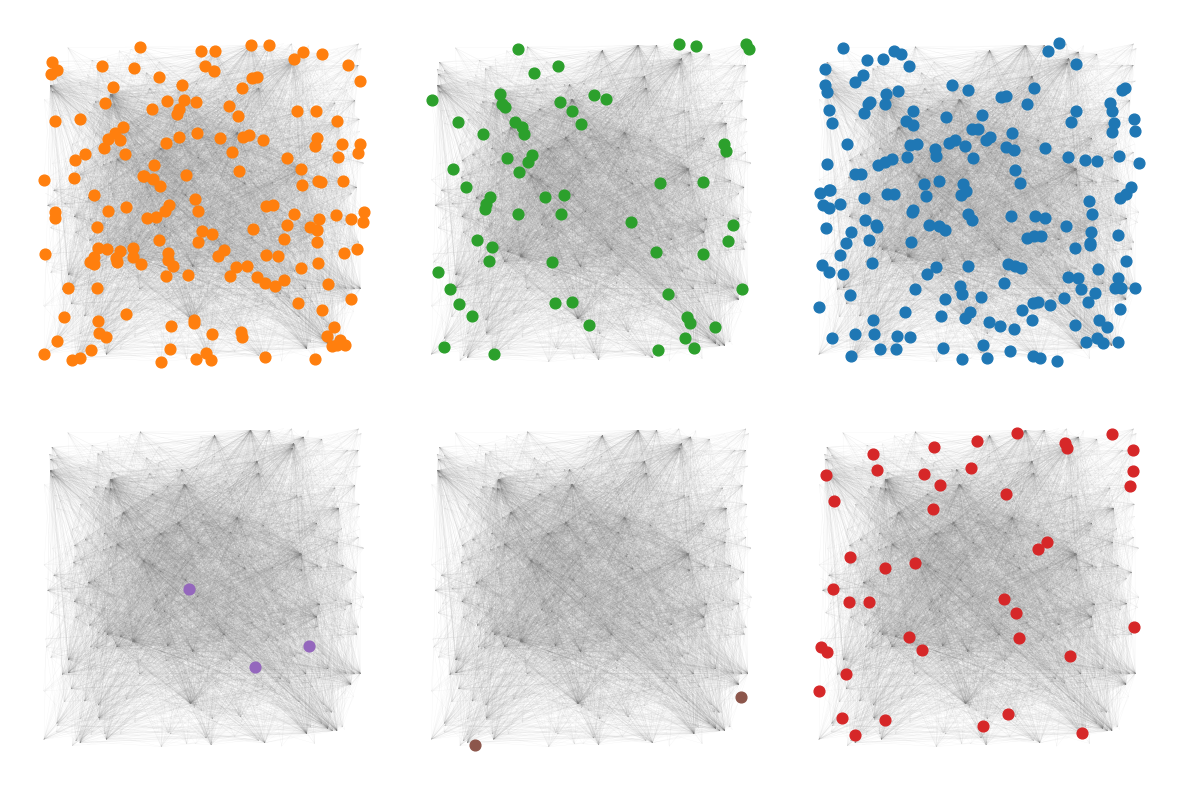

In [160]:
def plot_partition(G,partition):

    #BUILD PARTITION MAP
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    
    #PLOT
    fig, axs = plt.subplots(len(partition)//3,3)  # (,3)
    fig.set_size_inches(15, 5*(len(partition)//3))

    pos=nx.random_layout(G)
    i=0
    for community in set(partition_map.values()):
        nodes = [node for node in partition_map.keys() if partition_map[node] == community]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=60, node_color=f"C{community}", ax=axs[i//3,i%3-1])
        nx.draw_networkx_edges(G, 
                            pos,
                            width=0.2,
                            alpha=0.1,
                            edge_color="gray",
                            ax=axs[i//3,i%3-1])
        # nx.draw_networkx_labels(G, pos, ax=axs[i//3,i%3-1])
        i+=1

    # Don't show the axes
    for ax in axs.ravel():
        ax.set_axis_off()

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.savefig("../outputs/Louvain_partition.png",dpi=400, bbox_inches='tight')

    plt.show()


plot_partition(G3, partition_greedy)


In [143]:
dict(sorted(nx.edge_betweenness_centrality(G3).items(), key=lambda item: item[1], reverse=True))

{(8740, 8130): 0.005213918698484565,
 (6440, 9200): 0.005200367573463878,
 (1610, 4110): 0.004737178058585788,
 (2340, 9260): 0.0045792987099003675,
 (7720, 7110): 0.004237288135593222,
 (5300, 3230): 0.004237288135593221,
 (1040, 5830): 0.004237288135593221,
 (9620, 3900): 0.004237288135593221,
 (9620, 8360): 0.004237288135593221,
 (5620, 320): 0.004237288135593221,
 (7330, 6920): 0.004237288135593221,
 (7330, 7100): 0.004237288135593221,
 (3740, 3720): 0.004237288135593221,
 (3850, 3860): 0.004237288135593221,
 (2630, 8440): 0.00423728813559322,
 (6260, 400): 0.00423728813559322,
 (6230, 6820): 0.00423728813559322,
 (9000, 9330): 0.00423728813559322,
 (8740, 1420): 0.00423728813559322,
 (9600, 6740): 0.00423728813559322,
 (3130, 3260): 0.00423728813559322,
 (4760, 1800): 0.00423728813559322,
 (3620, 3160): 0.00423728813559322,
 (4610, 1450): 0.00423728813559322,
 (5410, 1840): 0.00423728813559322,
 (8130, 8600): 0.00423728813559322,
 (8330, 8340): 0.00423728813559322,
 (1610, 1640): 

# Skill importance

In [145]:
skill = pd.read_csv("../data/processed/skills_importance.csv")
skill.head(3)

occ  license  isaprobsolv  isa2waycomm  isateach  isamgppl  isagrossmotor  \
0  2910        1       3.0600      3.72000    2.8750  2.960000       1.792222   
1  2700        0       2.9400      3.93750    2.7500  2.753333       1.903333   
2  2920        1       3.2375      3.59375    2.5325  2.873334       1.561111   

   isaequiprepmnt  isasensperc  isaquant  isafocattn  isaservpersd  \
0           1.645        1.602      2.00       2.628       2.28000   
1           1.000        1.176      1.04       2.274       2.09250   
2           1.960        1.410      1.98       2.900       2.12625   

   isacreatvty  isafinemotor  
0     3.540000         3.072  
1     3.123333         1.800  
2     3.455000         2.950

In [146]:
skill.describe()

occ     license  isaprobsolv  isa2waycomm    isateach  \
count   337.000000  337.000000   337.000000   337.000000  337.000000   
mean   5953.531157    0.673591     3.186541     3.443953    2.534602   
std    2440.358396    0.469596     0.303937     0.387893    0.428069   
min     100.000000    0.000000     2.500000     2.562500    1.435000   
25%    4210.000000    0.000000     2.958333     3.091250    2.217500   
50%    6210.000000    1.000000     3.125000     3.405000    2.502500   
75%    8040.000000    1.000000     3.395000     3.803333    2.815000   
max    9750.000000    1.000000     3.990000     4.310000    4.000000   

         isamgppl  isagrossmotor  isaequiprepmnt  isasensperc    isaquant  \
count  337.000000     337.000000      337.000000   337.000000  337.000000   
mean     2.822669       2.035782        1.996781     1.630976    2.362968   
std      0.338327       0.505618        0.682489     0.504931    0.401216   
min      2.000000       1.013333        1.000000     1.000000    1.040000   
25%      2.626666       1.721111        1.353333     1.100000    2.054444   
50%      2.750000       2.124445        1.941146     1.633333    2.301667   
75%      2.928333       2.376111        2.500000     2.000000    2.645000   
max      3.960000       3.686667        3.790834     3.225000    3.586667   

       isafocattn  isaservpersd  isacreatvty  isafinemotor  
count  337.000000    337.000000   337.000000    337.000000  
mean     2.728633      2.105650     2.633380      2.830386  
std      0.267265      0.313215     0.368843      0.567846  
min      1.726000      1.372500     1.790000      1.300000  
25%      2.550000      1.872500     2.373333      2.350000  
50%      2.737000      2.095000     2.665556      2.980500  
75%      2.900000      2.312500     2.886667      3.274667  
max      3.624000      2.872500     3.843333      3.902000

Normalization

In [147]:
skill_copy = skill.copy()

for i in range(2,skill_copy.shape[1]):
    # Create the MinMaxScaler object
    scaler = MinMaxScaler()
    # Fit and transform each column
    skill_copy.iloc[:,i] = scaler.fit_transform(np.array(skill_copy.iloc[:,i]).reshape(-1, 1))

skill_copy.sort_values(by="occ",ascending=True,inplace=True,ignore_index=True)
skill_copy

occ  license  isaprobsolv  isa2waycomm  isateach  isamgppl  \
0     100        1     0.656599     0.805436  0.610136  0.872449   
1     140        1     0.886092     0.798045  0.736517  0.842970   
2     200        1     0.840045     0.744874  0.658869  0.786848   
3     210        1     0.840045     0.744874  0.658869  0.786848   
4     310        1     0.642058     0.751073  0.658869  0.828231   
..    ...      ...          ...          ...       ...       ...   
332  9650        1     0.488814     0.321411  0.333983  0.319161   
333  9720        1     0.294183     0.286123  0.171540  0.340136   
334  9730        0     0.085011     0.161660  0.122807  0.149660   
335  9740        0     0.364653     0.303290  0.415205  0.489796   
336  9750        0     0.224832     0.232475  0.269006  0.319728   

     isagrossmotor  isaequiprepmnt  isasensperc  isaquant  isafocattn  \
0         0.171654        0.134368     0.224719  0.589005    0.473130   
1         0.219174        0.434159     0.181423  0.823517    0.682122   
2         0.341369        0.407883     0.408390  0.688045    0.540218   
3         0.341369        0.407883     0.408390  0.688045    0.540218   
4         0.342477        0.275903     0.000000  0.738220    0.525817   
..             ...             ...          ...       ...         ...   
332       0.481851        0.547029     0.442247  0.507417    0.623112   
333       0.550291        0.462825     0.661573  0.133508    0.446786   
334       0.364505        0.372649     0.405393  0.197644    0.146470   
335       0.643807        0.477755     0.606742  0.589005    0.696523   
336       0.504156        0.425201     0.506067  0.393325    0.421496   

     isaservpersd  isacreatvty  isafinemotor  
0        0.668333     0.589286      0.316680  
1        0.672500     0.606061      0.480528  
2        0.661111     0.590368      0.608506  
3        0.661111     0.590368      0.608506  
4        0.855000     0.407468      0.558032  
..            ...          ...           ...  
332      0.252222     0.332251      0.727902  
333      0.420000     0.284091      0.681015  
334      0.000000     0.082792      0.616449  
335      0.230000     0.426948      0.797848  
336      0.115000     0.254870      0.707148  

[337 rows x 14 columns]

In [162]:
partition_map = {}
for idx, cluster_nodes in enumerate(partition_greedy):
    for node in cluster_nodes:
        partition_map[node] = idx
partition_map = dict(sorted(partition_map.items(), key=lambda x: x[0]))
    
occ=[]
cluster_id=[]
for node, community in partition_map.items():
    if node in list(skill_copy.loc[:,"occ"]):
        occ.append(node)
        cluster_id.append(community)

skill_copy = skill_copy[skill_copy['occ'].isin(occ)]
    

Apply K-means to the table of skill importance:

In [163]:
X=np.array(skill_copy.iloc[:,1:])

kmeans = KMeans(n_clusters=len(partition_greedy), random_state=0, n_init="auto").fit(X)
kmeans_labels = kmeans.labels_
kmeans_labels

d:\Program Files (x86)\Anaconda\envs\anly645\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



array([2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 4, 2, 5, 5, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 2, 2, 2, 5, 2, 2, 2, 5, 2, 1,
       2, 5, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 4, 4, 4, 5, 5, 1, 2, 0,
       5, 5, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 4, 4, 5, 2, 2, 5, 0, 2,
       0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 4, 1, 2, 2, 2,
       2, 2, 4, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 3, 3, 1, 3, 0, 3, 1, 4, 2, 0,
       4, 2, 0, 1, 0, 4, 0, 5, 4, 5, 3, 5, 0, 0, 0, 0, 3, 5, 0, 0, 0, 5,
       0, 3, 0, 5, 2, 5, 0, 5, 0, 5, 5, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 3, 0, 3, 4, 5, 0, 0, 0, 5, 5, 0,
       0, 4, 0, 0, 0, 0, 0, 3, 3, 3, 4, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0, 0,
       0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 5, 5, 0, 0, 0, 0, 5, 0, 5, 5, 5, 5, 5, 3,

In [164]:
# Calculate the Normalized Mutual Information (NMI)
nmi_score = normalized_mutual_info_score(cluster_id, kmeans_labels)
print("Normalized Mutual Information (NMI):", nmi_score)


Normalized Mutual Information (NMI): 0.2197996822892952


# Some Occupation in a Specific Field -- 

In [177]:
# Identify the nodes I want to keep
nodes_to_keep = [1000,1010,1020,1040,1060,1100,1110,1200,1210,1220,1230,1240]

# Find the neighborhood nodes for each of the specified nodes
neighborhood_nodes = set()
for node in nodes_to_keep:
    if node in list(G2.nodes):
        neighborhood_nodes |= set(G2.neighbors(node))
    else:
        nodes_to_keep.remove(node)

# Create a subgraph containing the specified nodes and their neighborhood nodes
G_computer = G2.subgraph(nodes_to_keep + list(neighborhood_nodes))

In [178]:
nxt.network_summary(G_computer)

GENERAL
	number of nodes: 78
	number of edges: 1206
	is_directed: True
	is_weighted: True
	is_strongly_connected: False
	is_weakly_connected: True
IN-DEGREE (NORMALIZED)
	min: 0.012987012987012988
	mean: 0.20079920079920077
	median: 0.18181818181818182
	max: 0.5584415584415585
	top nodes: [4760, 4110, 4720, 5240, 5620, 4020, 5400, 5700, 2340, 6260, 4250, 9130]
	           [0.5584415584415585, 0.5324675324675325, 0.5064935064935066, 0.5064935064935066, 0.5064935064935066, 0.4545454545454546, 0.4415584415584416, 0.38961038961038963, 0.37662337662337664, 0.35064935064935066, 0.35064935064935066, 0.33766233766233766]
	tail nodes: [6530, 1410, 8250, 9820, 2860, 830, 1220, 5830, 1230, 300]
	           [0.06493506493506494, 0.06493506493506494, 0.05194805194805195, 0.05194805194805195, 0.05194805194805195, 0.03896103896103896, 0.025974025974025976, 0.012987012987012988, 0.012987012987012988, 0.012987012987012988]
OUT-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.20079920079920077
	median: 0.15584415

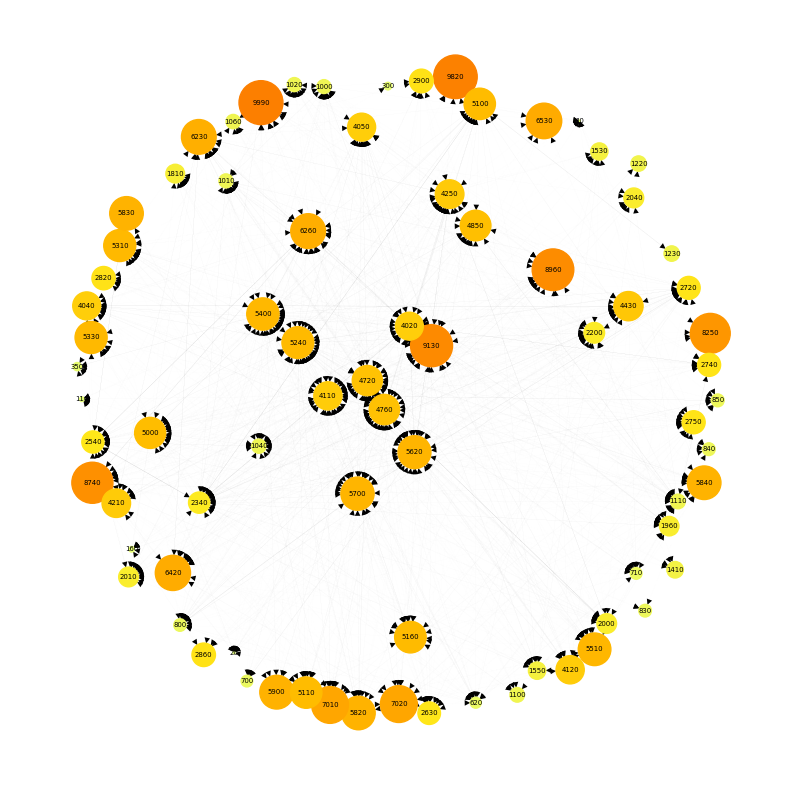

In [202]:
cmap_n = plt.colormaps.get_cmap("Wistia")

betweenness_centrality = nx.betweenness_centrality(G_computer)
closeness_centrality = nx.closeness_centrality(G_computer)

colors_n = [cmap_n(u/(0.01+max(betweenness_centrality))) for u in betweenness_centrality]
node_size = [1000*u/(0.01+max(closeness_centrality)) for u in closeness_centrality]
edge_thickness = [(val[2]/1000)*2 for val in G2.edges.data("weight")]

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

nx.draw(
        G_computer,
	    node_color=colors_n,
	    node_size=node_size, 
	    width=edge_thickness,
	    with_labels=True,
        font_color="black",
        font_size=5,
	    pos=nx.spring_layout(G_computer, k=50*1./np.sqrt(len(G_computer.nodes)), iterations=100),
        ax=ax
    )
plt.show()

Get the precedents and successors of a specific occupation

In [234]:
def plot_specified_occ(G, occ:list):

    # Find the neighborhood nodes for each of the specified nodes
    neighborhood_nodes = set()
    for node in occ:
        if node in list(G.nodes):
            neighborhood_nodes |= set(G2.successors(node))
            neighborhood_nodes |= set(G2.predecessors(node))
        else:
            occ.remove(node)

    # Create a subgraph containing the specified nodes and their neighborhood nodes
    occ_subgraph = G2.subgraph(occ + list(neighborhood_nodes))

    cmap_n = plt.colormaps.get_cmap("Wistia")

    betweenness_centrality = nx.betweenness_centrality(occ_subgraph)
    closeness_centrality = nx.closeness_centrality(occ_subgraph)

    colors_n = [cmap_n(u/(0.01+max(betweenness_centrality))) for u in betweenness_centrality]
    node_size = [3000*u/(0.01+max(closeness_centrality)) for u in closeness_centrality]
    edge_thickness = [(val[2]/100) for val in occ_subgraph.edges.data("weight")]

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)

    nx.draw(
            occ_subgraph,
	        node_color=colors_n,
	        node_size=node_size, 
	        width=edge_thickness,
            arrowsize=5,

	        with_labels=True,
            font_color="black",
            font_size=12,
	        pos=nx.spring_layout(occ_subgraph, k=50*1./np.sqrt(len(occ_subgraph.nodes)), iterations=100),
            ax=ax
        )
    plt.show()

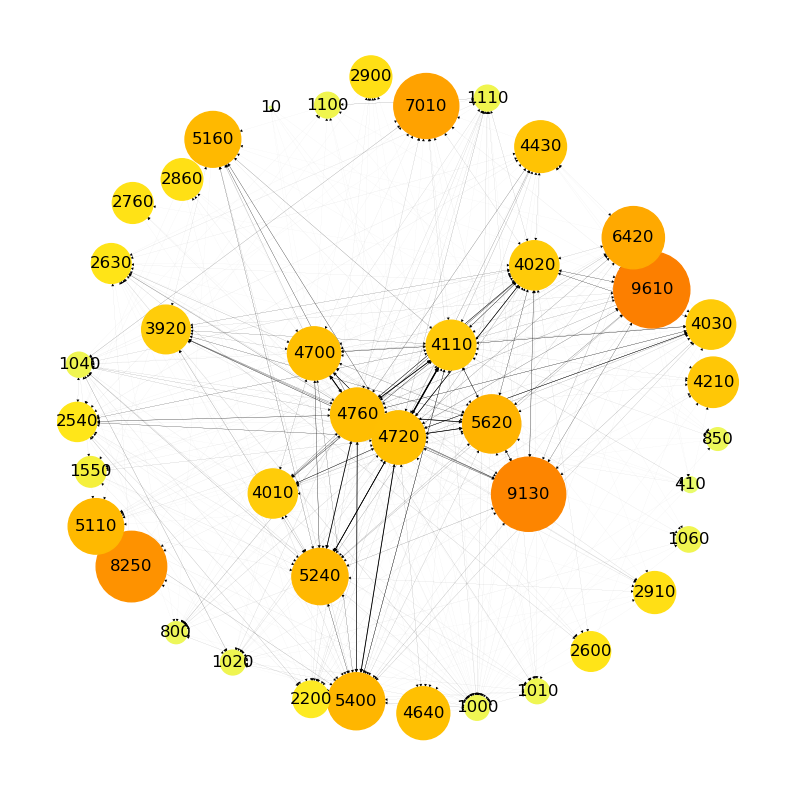

In [224]:
plot_specified_occ(G2, [1000])  # Computer scientists and systems analysts

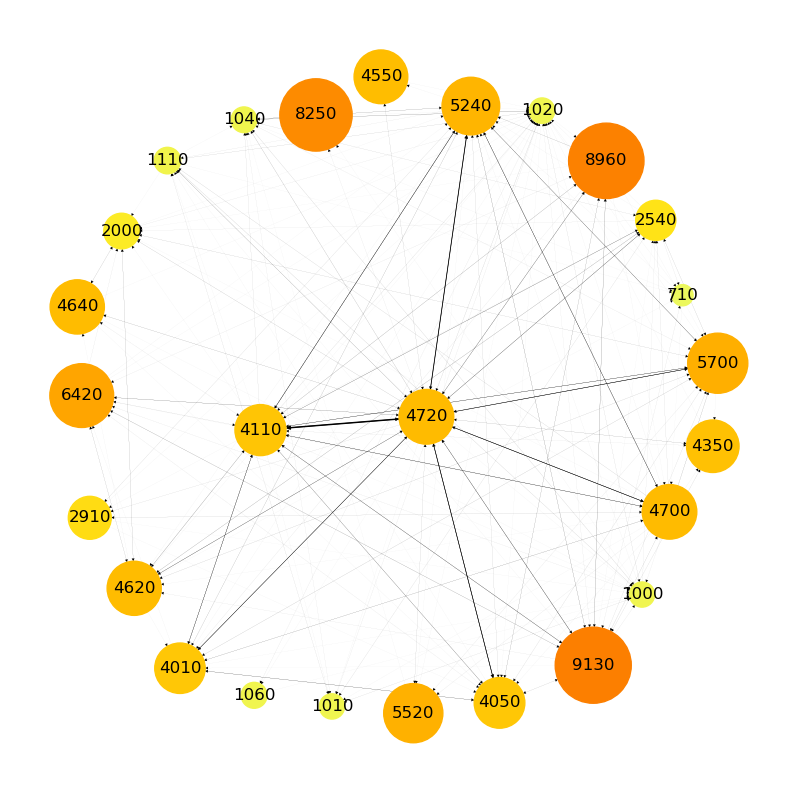

In [225]:
plot_specified_occ(G2, [1020])  # Computer software engineers

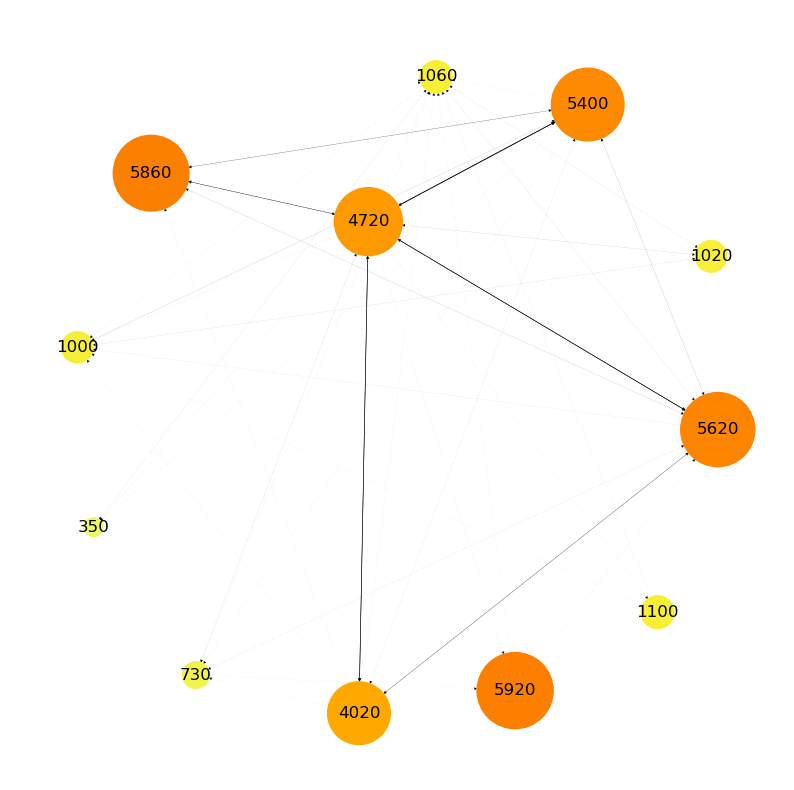

In [226]:
plot_specified_occ(G2, [1060])  # Database administrators

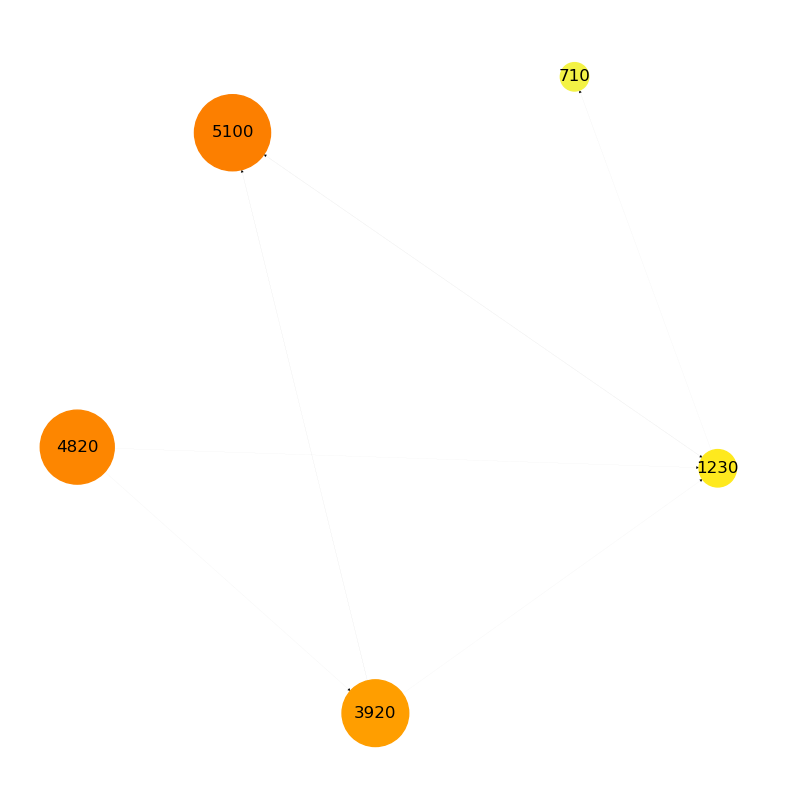

In [227]:
plot_specified_occ(G2, [1230])  # Statisticians

In [254]:
# Using shortest_path function
shortest_path = nx.shortest_path(G1, source='1010', target='6420', weight='weight')
print("Shortest path:", shortest_path)

# Using shortest_path_length function
shortest_path_length = nx.shortest_path_length(G1, source='1010', target='6420', weight='weight')
print("Shortest path length:", shortest_path_length)

Shortest path: ['1010', '1000', '6420']
Shortest path length: 2
